In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="ticks", palette="pastel")

PATH = 'C:/Users/user/Desktop/AI & ML/Project/FordA/'

In [2]:
#read training file, in future this will be called as function
#df_read = pd.read_csv(PATH+"FordB_Train_TAO.csv",names=["file_name","label"],header=None)

df_read = pd.read_csv(PATH+"FordA_TEST_TA.csv",names=["file_name","label"],header=None)

In [3]:
#A feature Dataframe, feature columns will be added later
df_feature = df_read.set_index("file_name")
df_feature.shape

(3601, 1)

In [4]:
#create a df with details of all csv in training file
df_result = pd.DataFrame(index=range(0,500))

for eachfile in df_read["file_name"].tolist():
    df_test = pd.read_csv(PATH+eachfile+".csv",names=[eachfile],header=None)
    df_result[eachfile] = df_test


In [5]:
#transpose of resut DF
result = df_result.T
#print result DF
result.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
FordA_TEST_1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,1.6408,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
FordA_TEST_2,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,-1.6200,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
FordA_TEST_3,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,-2.5506,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
FordA_TEST_4,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,-1.5069,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
FordA_TEST_5,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,1.4665,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


In [6]:
#adding columns in feature df, each column represent a feature
df_feature["mean"] = result.mean(axis=1)
df_feature["var"] = result.var(axis=1)
df_feature["std"] = result.std(axis=1)
df_feature["skew"] = result.skew(axis=1)
df_feature["kurt"] = result.kurt(axis=1)
df_feature["mode"] = result.max(axis=1) - result.min(axis=1)
df_feature["kurtosis"] = result.kurtosis(axis=1)

# Feature selection in Time Domain

Below cells are to visualise different feature in Time domain.


# Comparison of Mean's for Good vs Bad engine

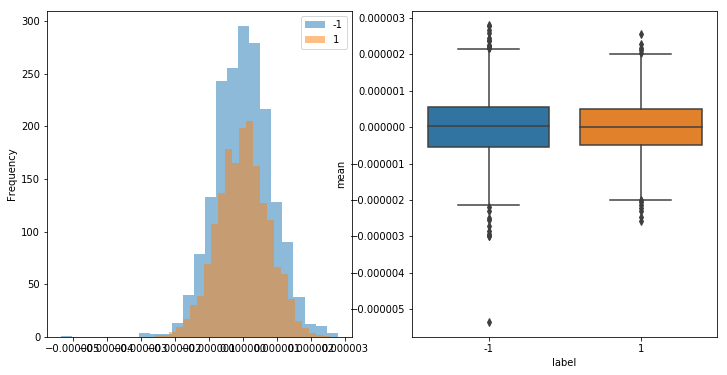

In [7]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean', data = df_feature,ax=ax[1])
#sns.scatterplot(x = 'mean',y = 'mean', data = df_feature,ax=ax[2])

# Comparison of Variance's for Good vs Bad engine

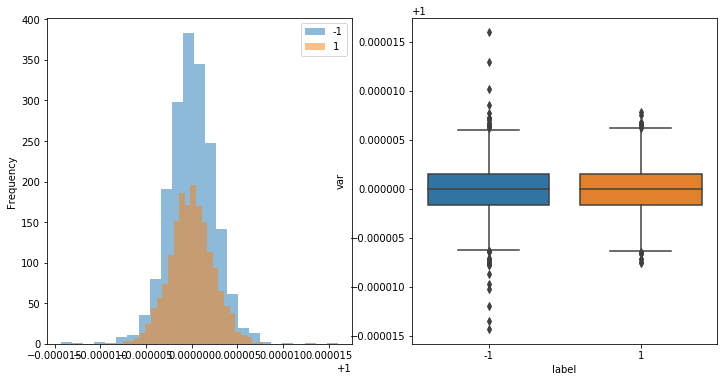

In [8]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var', data = df_feature,ax=ax[1])

# Comparison of Mean's for Good vs Bad engine

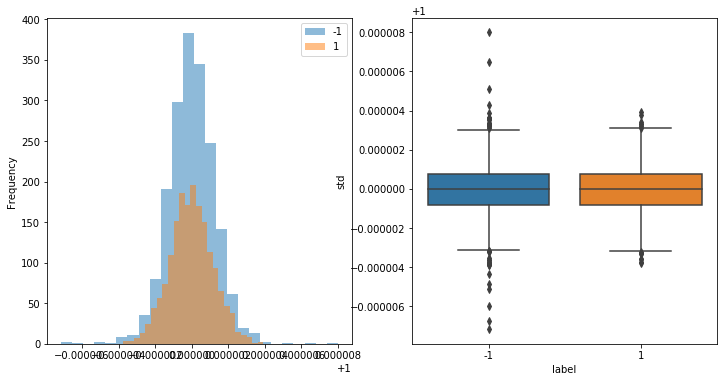

In [9]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std', data = df_feature,ax=ax[1])

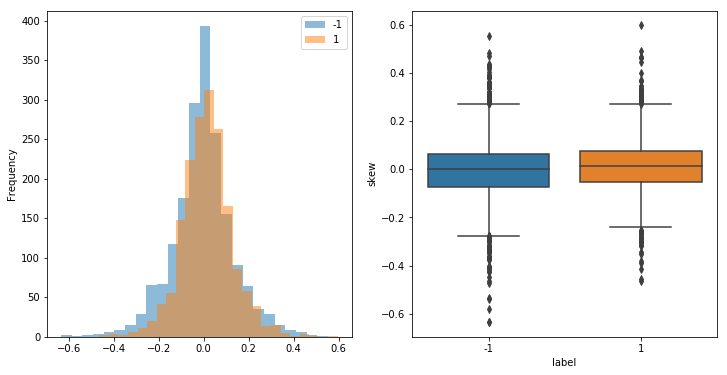

In [10]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew', data = df_feature,ax=ax[1])

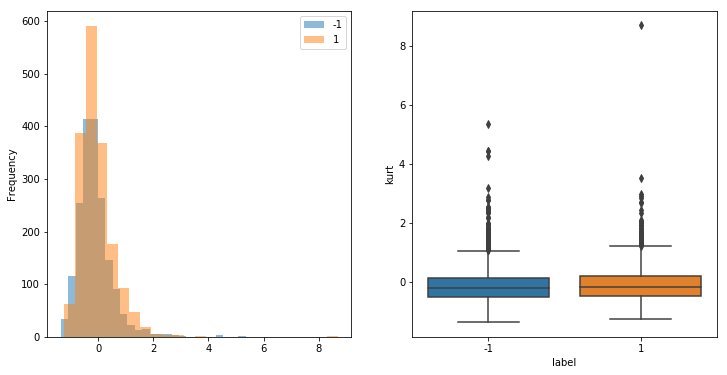

In [11]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt', data = df_feature,ax=ax[1])

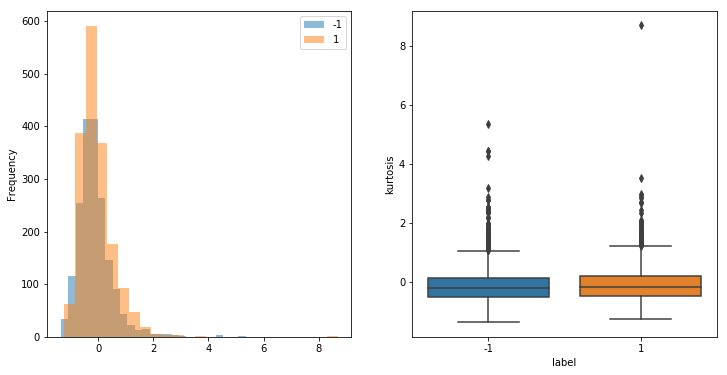

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

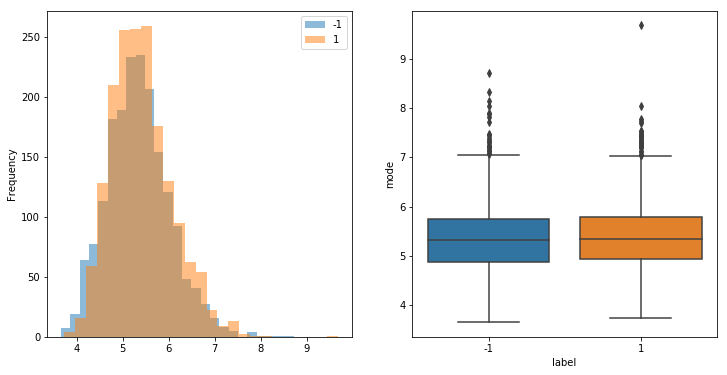

In [13]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode', data = df_feature,ax=ax[1])

# ZCR plot

In [14]:
def zero_crossing_rate_BruteForce(enginedata):
    
    zero_crossings = 0
    
    for i in range(1, len(enginedata)):
        
        if ( enginedata[i - 1] <  0 and enginedata[i] >  0 ) or \
           ( enginedata[i - 1] >  0 and enginedata[i] <  0 ) or \
           ( enginedata[i - 1] != 0 and enginedata[i] == 0):
                
                zero_crossings += 1
                
    zero_crossing_rate = zero_crossings / float(len(enginedata) - 1)

    return zero_crossing_rate

In [15]:
zcr = []
for j in range(0,result.shape[0]):
    zcr.append(zero_crossing_rate_BruteForce(result.iloc[j]))

In [16]:
df_feature["zcr"] = zcr

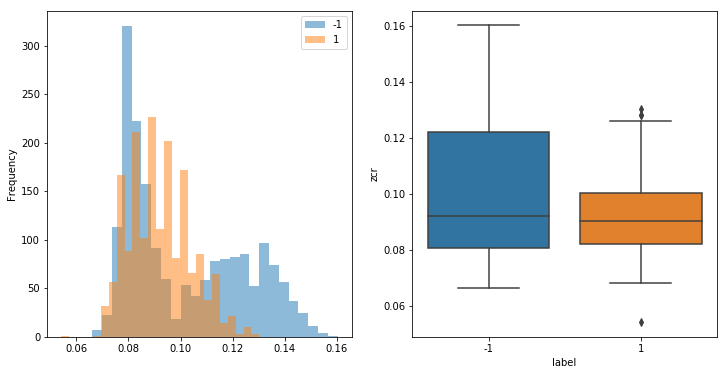

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["zcr"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'zcr', data = df_feature,ax=ax[1])

# RMS plot

In [18]:
df_feature["rms"] = result.pow(2).sum(axis=1) / 500
df_feature["rms"] = df_feature["rms"].pow(1/2)

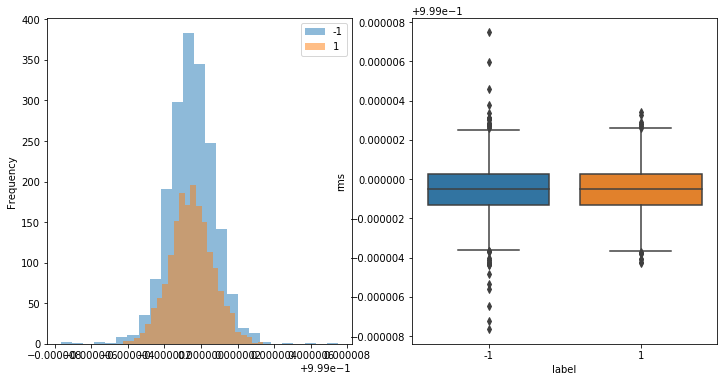

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms', data = df_feature,ax=ax[1])

# Energy Data plot

In [20]:
df_feature['energy'] = result.pow(2).sum(axis=1)

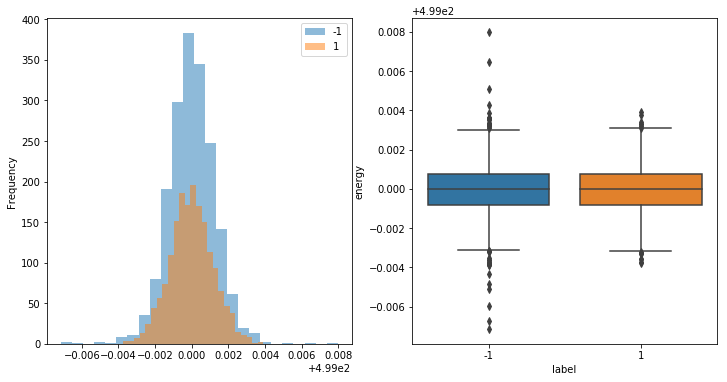

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy', data = df_feature,ax=ax[1])

# Crest Factor

In [22]:
df_feature['CF'] = result.abs().max(axis=1)/result.pow(2).mean(axis=1).pow(1/2)

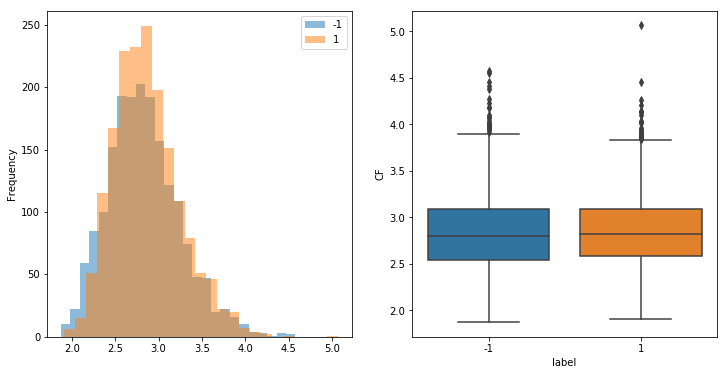

In [23]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["CF"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'CF', data = df_feature,ax=ax[1])

# Visualising Sensor Data

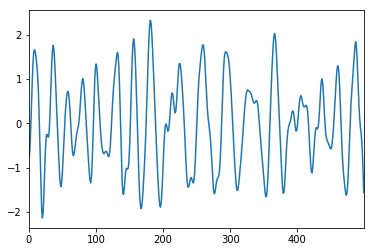

In [24]:
#sample plot of good engine data
result.iloc[0].plot()

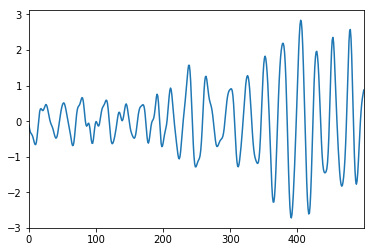

In [25]:
# plot of a bad engine data in time domain
result.iloc[12].plot()

# Feature analysis in Frequency Domain

# Mean plot in FFT

In [26]:
from scipy.fftpack import fft,fftfreq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Adding fft features

In [27]:
result_fft = pd.DataFrame([(2/500 * np.abs(fft(result.iloc[x])[0:np.int(500/2)])) for x in range(0,result.shape[0])],index=df_feature.index)

df_feature['mean_fft'] = result_fft.mean(axis=1)
df_feature['std_fft'] = result_fft.std(axis=1)
df_feature['var_fft'] = result_fft.var(axis=1)
df_feature['skew_fft'] = result_fft.skew(axis=1)
df_feature['kurt_fft'] = result_fft.kurt(axis=1)
df_feature['kurtosis_fft'] = result_fft.kurtosis(axis=1)
df_feature['energy_fft'] = result_fft.pow(2).sum(axis=1)
df_feature["rms_fft"] = result_fft.pow(2).sum(axis=1) / 500
df_feature["rms_fft"] = df_feature["rms_fft"].pow(1/2)
df_feature.head()

,label,mean,var,std,skew,kurt,mode,kurtosis,zcr,rms,energy,CF,mean_fft,std_fft,var_fft,skew_fft,kurt_fft,kurtosis_fft,energy_fft,rms_fft
file_name,,,,,,,,,,,,,,,,,,,,
FordA_TEST_1,-1,5.676000e-07,0.999995,0.999998,0.076154,-0.860887,4.4628,-0.860887,0.072144,0.998997,498.997528,2.329136,0.028539,0.084843,0.007198,5.118854,29.130797,29.130797,1.995988,0.063182
FordA_TEST_2,1,1.150000e-07,1.000001,1.000001,-0.019144,-0.434196,4.8047,-0.434196,0.078156,0.999000,499.000641,2.448248,0.026435,0.085525,0.007314,5.550576,34.618289,34.618289,1.996000,0.063182
FordA_TEST_3,-1,-3.654200e-07,0.999997,0.999998,-0.278251,-0.040439,5.0657,-0.040439,0.068136,0.998998,498.998403,2.732638,0.026760,0.085423,0.007297,7.947281,82.245182,82.245182,1.995993,0.063182
FordA_TEST_4,-1,1.839600e-07,1.000004,1.000002,-0.087143,0.039109,5.7415,0.039109,0.086172,0.999001,499.001886,3.182478,0.026398,0.085536,0.007316,6.541626,50.833638,50.833638,1.996007,0.063182
FordA_TEST_5,-1,2.902000e-07,0.999999,0.999999,-0.632179,1.695816,7.0106,1.695816,0.136273,0.998999,498.999500,4.081385,0.038885,0.080610,0.006498,2.409607,5.255822,5.255822,1.995996,0.063182


# Plots in Frequency domain

Mean Plot

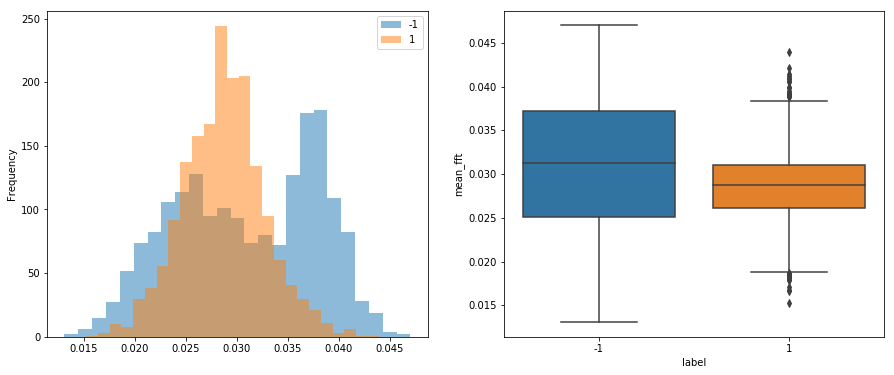

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
df_feature.groupby("label")["mean_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fft', data = df_feature,ax=ax[1])

STD Plot

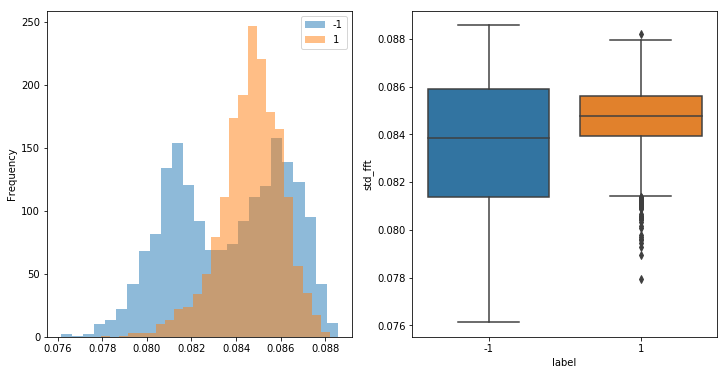

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fft', data = df_feature,ax=ax[1])

Var Plot

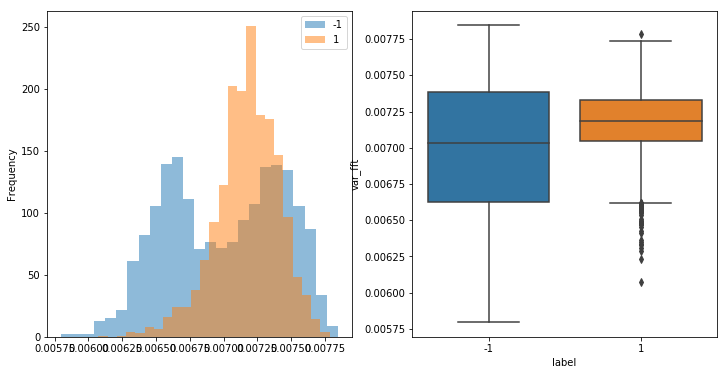

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fft', data = df_feature,ax=ax[1])

Skew Plot

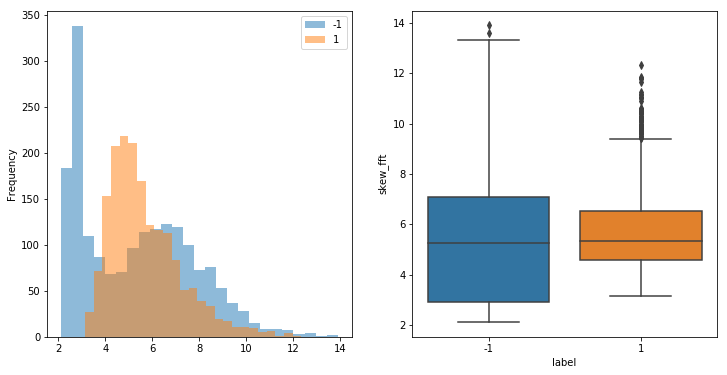

In [31]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fft', data = df_feature,ax=ax[1])

Kurt Plot

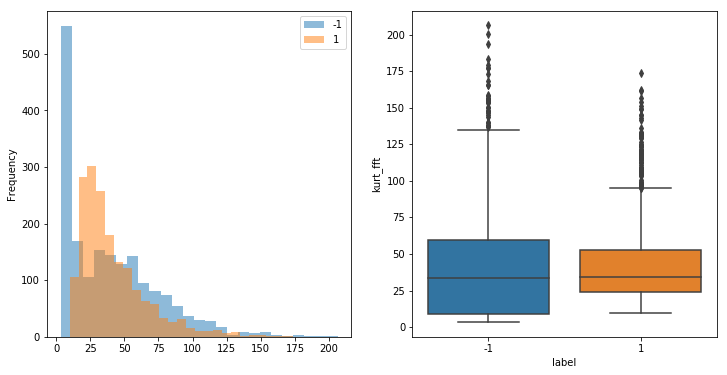

In [32]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fft', data = df_feature,ax=ax[1])

Kurtosis Plot

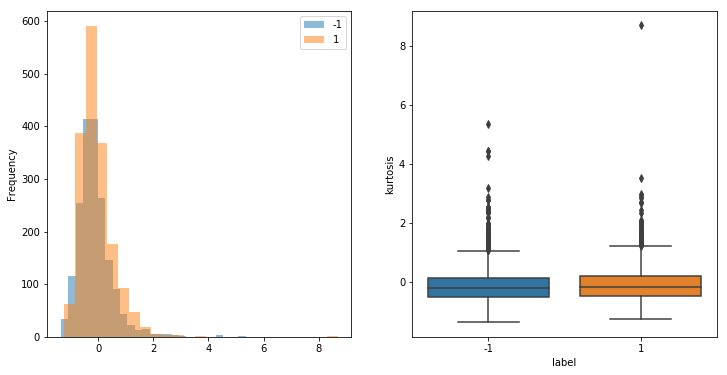

In [33]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

Energy Plot

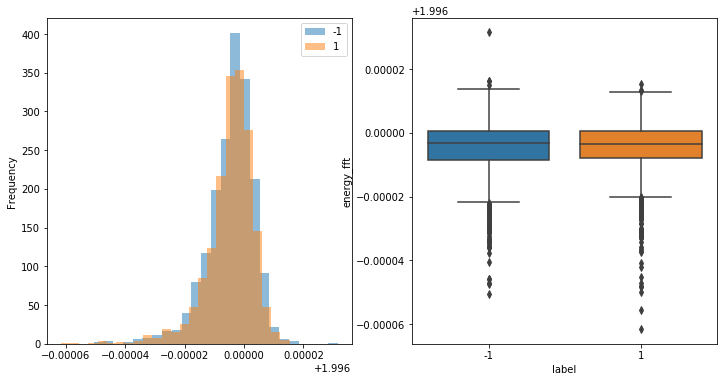

In [34]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy_fft', data = df_feature,ax=ax[1])

RMS Plot

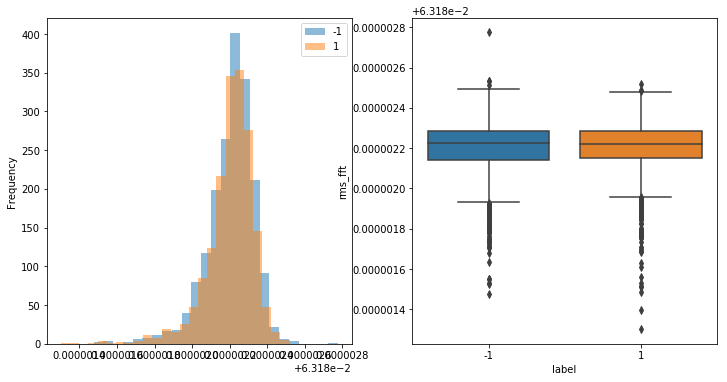

In [35]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms_fft', data = df_feature,ax=ax[1])

In [36]:
result_fft['label'] = df_feature['label']

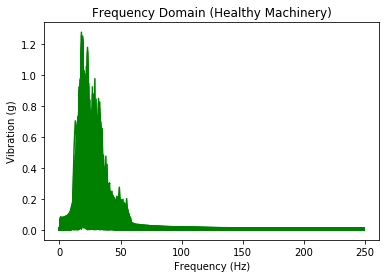

In [37]:
# FFT superimpose Good engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(0,250)], result_fft_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

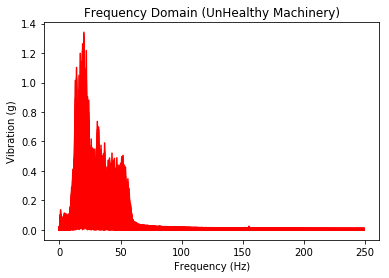

In [38]:
# FFT superimpose Bad engine
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(0,250)], result_fft_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (UnHealthy Machinery)');

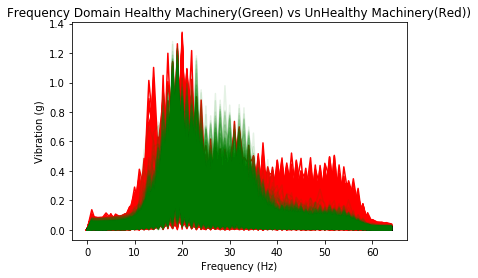

In [39]:
# FFT superimpose Good engine vs Bad engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(0,65)], result_fft_bad.iloc[ix][0:65], linestyle='-', color='red')
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(0,65)], result_fft_good.iloc[ix][0:65], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain Healthy Machinery(Green) vs UnHealthy Machinery(Red))');

# FFT -WINDOWED

In [40]:
result_fft_windowed = result_fft.drop([i for i in range(66,250)],axis=1)
result_fft_windowed = result_fft_windowed.drop([i for i in range(0,20)],axis=1)
result_fft_windowed = result_fft_windowed.drop(['label'],axis=1)
result_fft_windowed.head()

,20,21,22,23,24,25,26,27,28,29,...,56,57,58,59,60,61,62,63,64,65
file_name,,,,,,,,,,,,,,,,,,,,,
FordA_TEST_1,0.511528,0.691662,0.134351,0.089041,0.189270,0.086276,0.108919,0.033711,0.099155,0.021505,...,0.030340,0.020966,0.034272,0.013038,0.010893,0.008929,0.008085,0.011828,0.006598,0.006084
FordA_TEST_2,0.259225,0.056503,0.299883,0.310010,0.129557,0.075637,0.074629,0.082926,0.074291,0.087219,...,0.014210,0.025438,0.002896,0.001483,0.011189,0.007861,0.007782,0.007239,0.006452,0.006871
FordA_TEST_3,0.485678,0.213904,0.113843,0.027784,0.113648,0.051295,0.102752,0.085416,0.098299,0.052889,...,0.035155,0.026029,0.024676,0.003542,0.005301,0.003387,0.003852,0.004112,0.005082,0.004560
FordA_TEST_4,0.718812,0.825814,0.353302,0.181583,0.194415,0.166243,0.085485,0.144357,0.058097,0.115385,...,0.027670,0.026354,0.021008,0.027639,0.015885,0.006864,0.005082,0.007691,0.007871,0.005937
FordA_TEST_5,0.337205,0.135464,0.193755,0.243300,0.083808,0.188532,0.082815,0.078960,0.243375,0.254820,...,0.084361,0.049598,0.049617,0.030799,0.021050,0.014578,0.008834,0.004377,0.001774,0.004528


In [41]:
#adding columns in feature df, each column represent a feature
df_feature["mean_fftw"] = result_fft_windowed.mean(axis=1)
df_feature["var_fftw"] = result_fft_windowed.var(axis=1)
df_feature["std_fftw"] = result_fft_windowed.std(axis=1)
df_feature["skew_fftw"] = result_fft_windowed.skew(axis=1)
df_feature["kurt_fftw"] = result_fft_windowed.kurt(axis=1)
df_feature["mode_fftw"] = result_fft_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_fftw"] = result_fft_windowed.kurtosis(axis=1)

Mean Plot

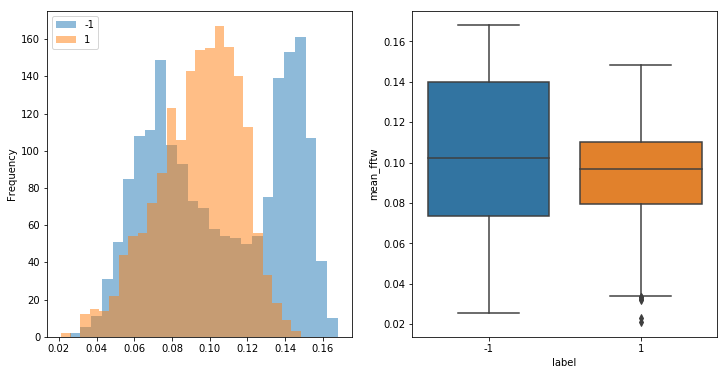

In [42]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fftw', data = df_feature,ax=ax[1])

Var PLot

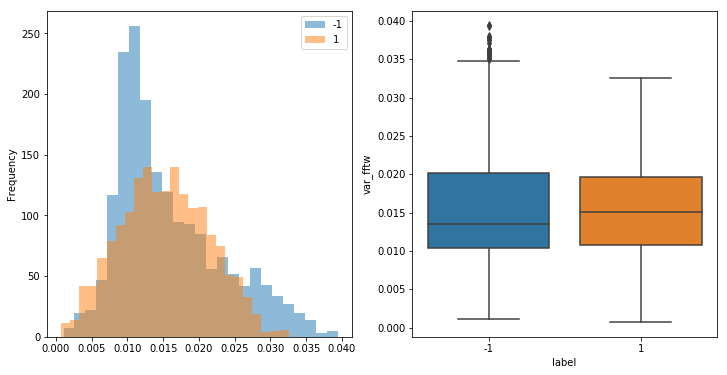

In [43]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fftw', data = df_feature,ax=ax[1])

std plot

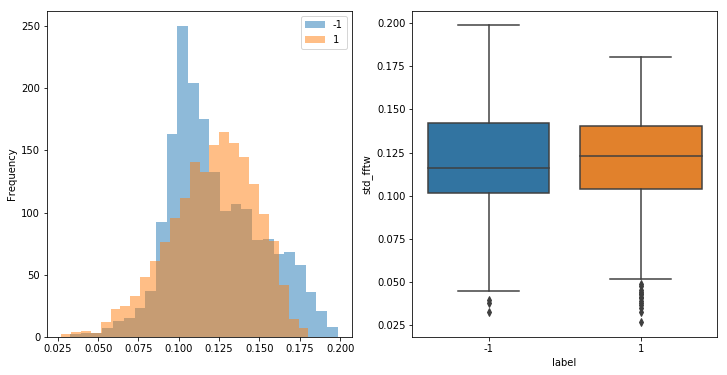

In [44]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fftw', data = df_feature,ax=ax[1])

skew plot

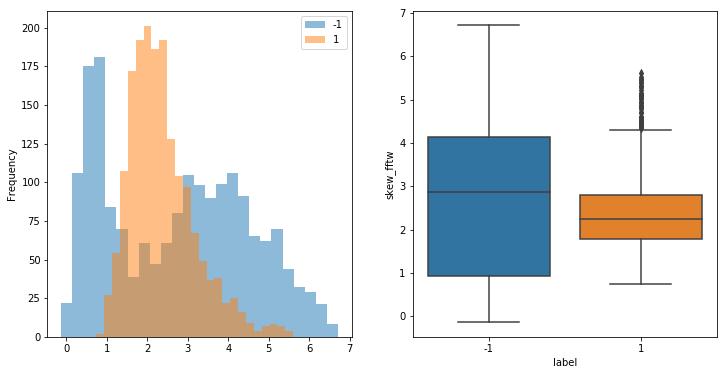

In [45]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fftw', data = df_feature,ax=ax[1])

kurt plot

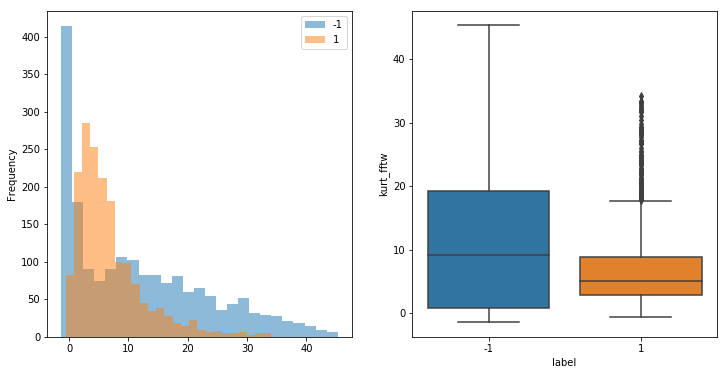

In [46]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fftw', data = df_feature,ax=ax[1])

Mode plot

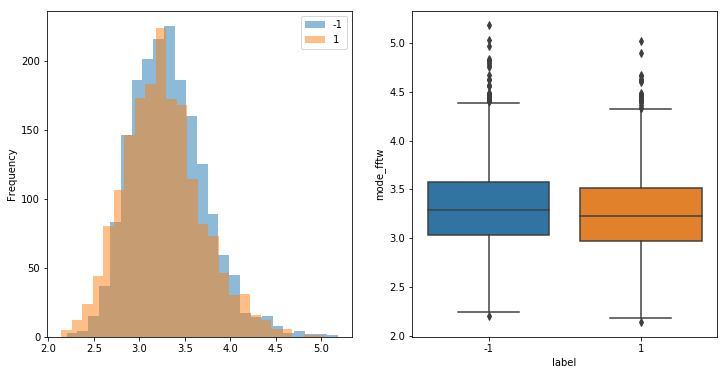

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_fftw', data = df_feature,ax=ax[1])

# Power Spectral Density

In [48]:
from scipy.signal import welch


In [49]:
freq_value, _w =welch(result.iloc[0])

In [50]:
result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

In [51]:
result_psd['label'] = df_feature['label']

Text(0, 0.5, 'PSD [V**2 / Hz]')

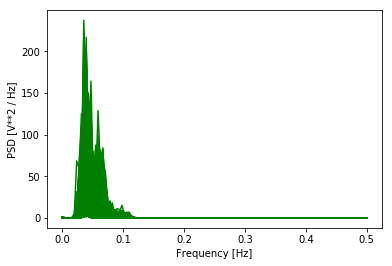

In [52]:
#Good Engine plot
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value, result_psd_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

Text(0, 0.5, 'PSD [V**2 / Hz]')

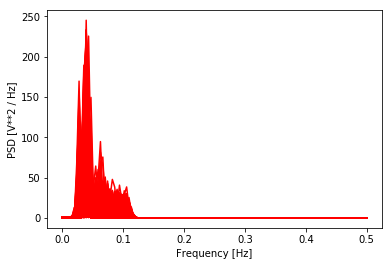

In [53]:
#Bad Engine plot
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value, result_psd_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

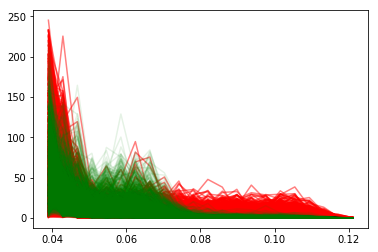

In [54]:
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value[10:32], result_psd_bad.iloc[ix][10:32], linestyle='-', color='red',alpha=0.5)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value[10:32], result_psd_good.iloc[ix][10:32], linestyle='-', color='green',alpha=0.1)


In [55]:
result_psd_windowed = result_psd.drop([i for i in range(33,129)],axis=1)
result_psd_windowed = result_psd_windowed.drop([i for i in range(0,10)],axis=1)
result_psd_windowed = result_psd_windowed.drop(['label'],axis=1)
result_psd_windowed.head()

,10,11,12,13,14,15,16,17,18,19,...,23,24,25,26,27,28,29,30,31,32
file_name,,,,,,,,,,,,,,,,,,,,,
FordA_TEST_1,54.095817,29.957020,2.169102,6.038753,1.807739,1.021101,1.380191,2.633775,2.292355,0.668632,...,1.274320,0.313857,0.235051,0.680419,0.691525,0.545459,0.200307,0.038438,0.015789,0.003393
FordA_TEST_2,52.045547,14.357717,13.631967,4.832217,0.578345,7.020021,2.981064,0.833268,0.303368,0.052341,...,0.192930,0.169324,0.098941,0.104015,0.177185,0.127967,0.052127,0.038301,0.004099,0.000121
FordA_TEST_3,49.992576,23.649154,2.597866,1.218785,1.603868,0.695326,3.673673,2.321484,0.122810,0.564920,...,0.685493,1.478173,1.238234,0.503132,0.170713,0.115941,0.175421,0.041115,0.007270,0.000628
FordA_TEST_4,27.488566,69.275076,22.812772,3.940260,1.528318,1.981905,1.810537,0.820520,0.290344,0.452252,...,0.174052,0.184589,0.370910,0.740388,0.747077,0.526075,0.117711,0.056878,0.019311,0.000969
FordA_TEST_5,15.987747,6.224538,9.418377,5.426740,8.089879,16.442348,14.236823,15.553130,12.754876,4.482703,...,16.347008,9.625276,1.931253,8.713713,8.811672,13.516336,5.363685,0.611320,0.113447,0.005015


In [56]:
#adding columns in feature df, each column represent a feature
df_feature["mean_psd"] = result_psd_windowed.mean(axis=1)
df_feature["var_psd"] = result_psd_windowed.var(axis=1)
df_feature["std_psd"] = result_psd_windowed.std(axis=1)
df_feature["skew_psd"] = result_psd_windowed.skew(axis=1)
df_feature["kurt_psd"] = result_psd_windowed.kurt(axis=1)
df_feature["mode_psd"] = result_psd_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_psd"] = result_psd_windowed.kurtosis(axis=1)

Mean Plot

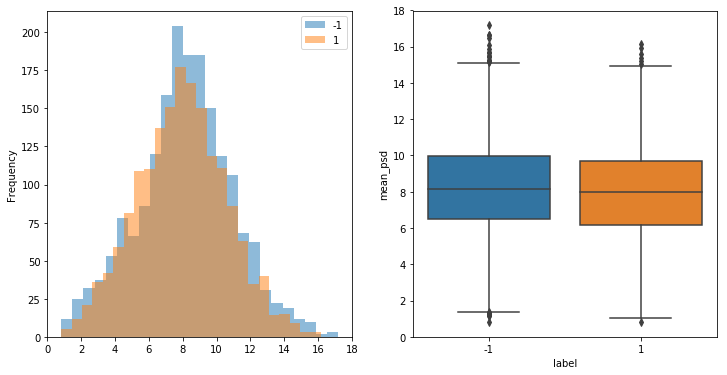

In [57]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_psd', data = df_feature,ax=ax[1])

var

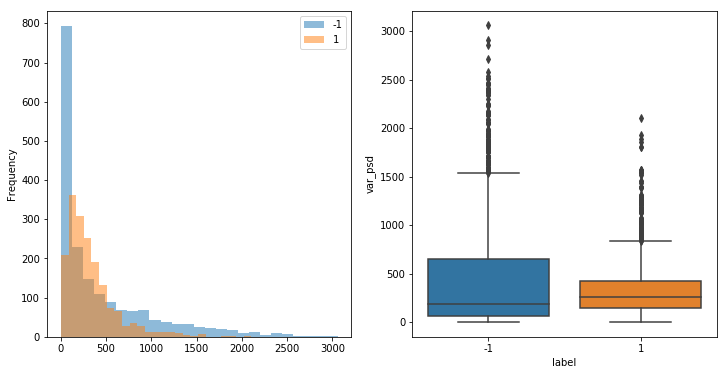

In [58]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_psd', data = df_feature,ax=ax[1])

std plot

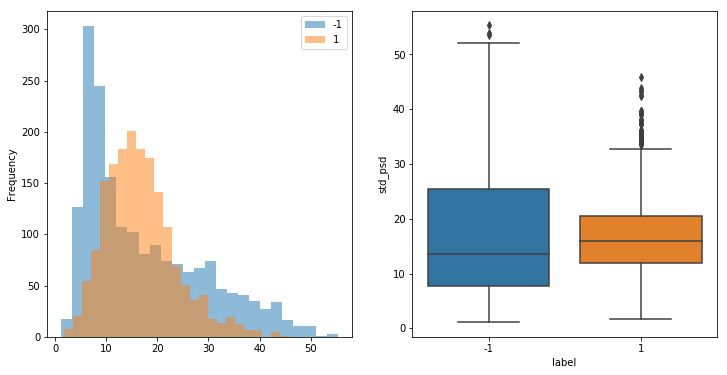

In [59]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_psd', data = df_feature,ax=ax[1])

skew plot

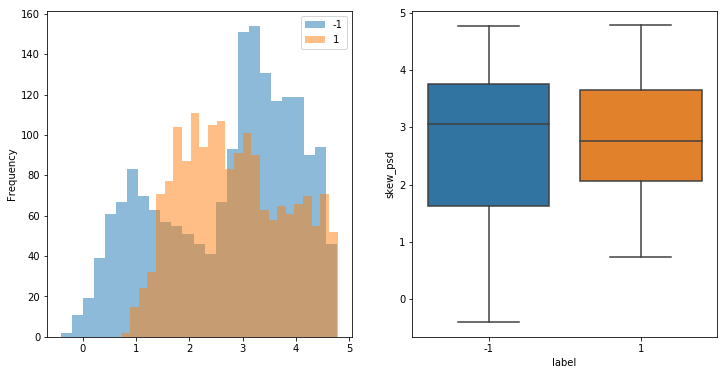

In [60]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_psd', data = df_feature,ax=ax[1])

kurt plot

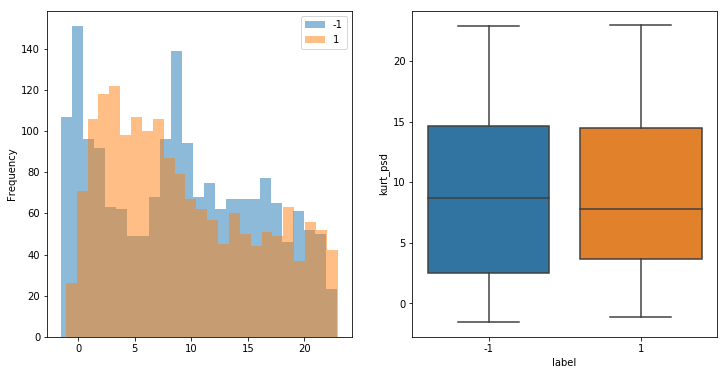

In [61]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_psd', data = df_feature,ax=ax[1])

mode plot

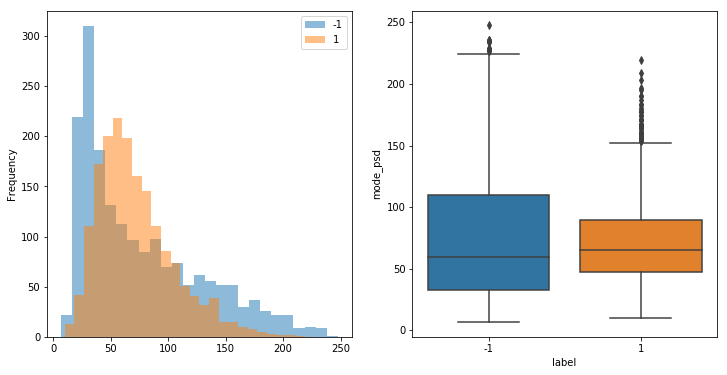

In [62]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_psd', data = df_feature,ax=ax[1])

# Pywavelet

Approximation coefficient contains high freq signal(passed from low pass filter) , Deatil Cofficient contains low freq signal(high pass filter).

CA - contain high freq
CD - contain low freq

Ceeating CA at 4 scales[0:250],[0,125],[0,62],[0,31]
and DC at [0,250]

In [63]:
from pywt import dwt

In [64]:
CA1 = []
CD1 = []
for x in range(0,result.shape[0]):
    cA,cD = dwt(result.iloc[x],'db1')
    CA1.append(cA)
    CD1.append(cD)

result_wave_CA1 = pd.DataFrame(CA1,index=df_feature.index)
result_wave_CD1 = pd.DataFrame(CD1,index=df_feature.index)

In [65]:
df_feature["mean_ca1"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca1"] = result_wave_CA1.var(axis=1)
df_feature["std_ca1"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca1"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca1"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca1"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca1"] = result_wave_CA1.kurtosis(axis=1)

In [66]:
df_feature["mean_cd1"] = result_wave_CD1.mean(axis=1)
df_feature["var_cd1"] = result_wave_CD1.var(axis=1)
df_feature["std_cd1"] = result_wave_CD1.std(axis=1)
df_feature["skew_cd1"] = result_wave_CD1.skew(axis=1)
df_feature["kurt_cd1"] = result_wave_CD1.kurt(axis=1)
df_feature["mode_cd1"] = result_wave_CD1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_cd1"] = result_wave_CD1.kurtosis(axis=1)

# Coefficient Approximation plot at scale1

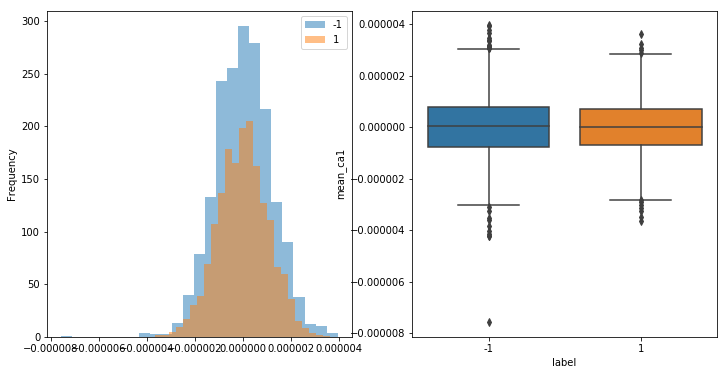

In [67]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca1', data = df_feature,ax=ax[1])

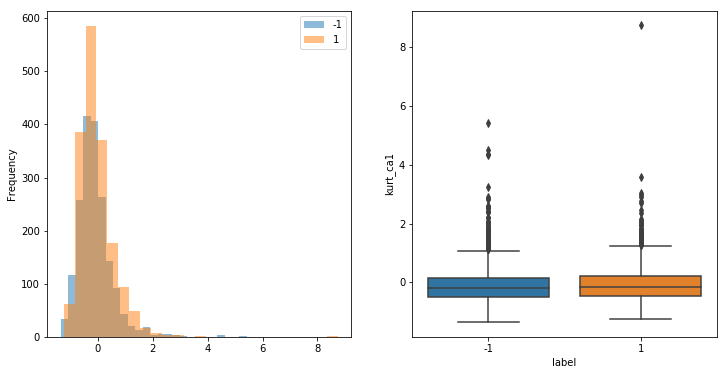

In [68]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca1', data = df_feature,ax=ax[1])

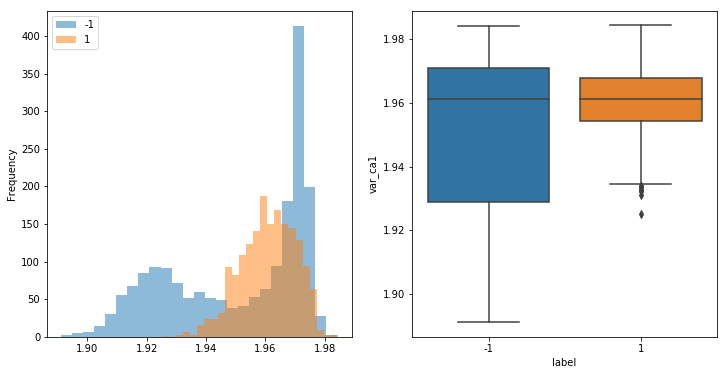

In [69]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca1', data = df_feature,ax=ax[1])

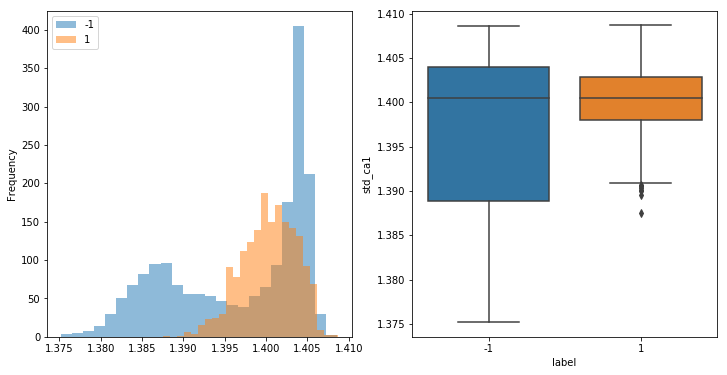

In [70]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca1', data = df_feature,ax=ax[1])

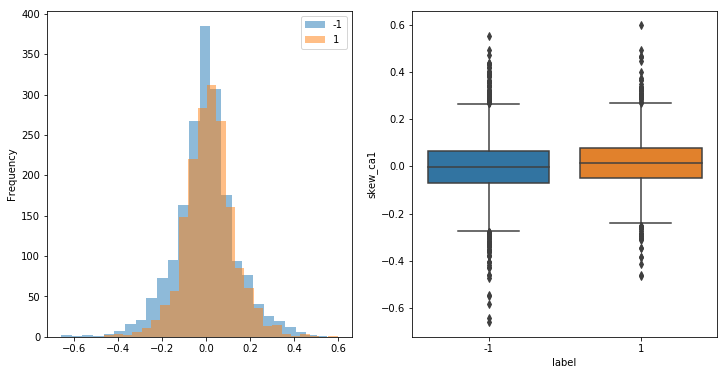

In [71]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca1', data = df_feature,ax=ax[1])

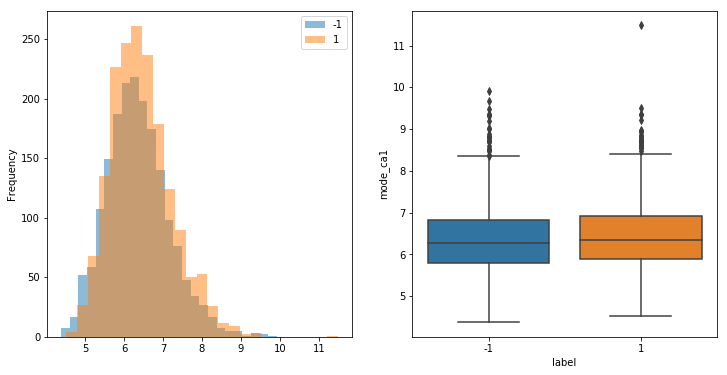

In [72]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca1', data = df_feature,ax=ax[1])

# Coefficient Details plot 

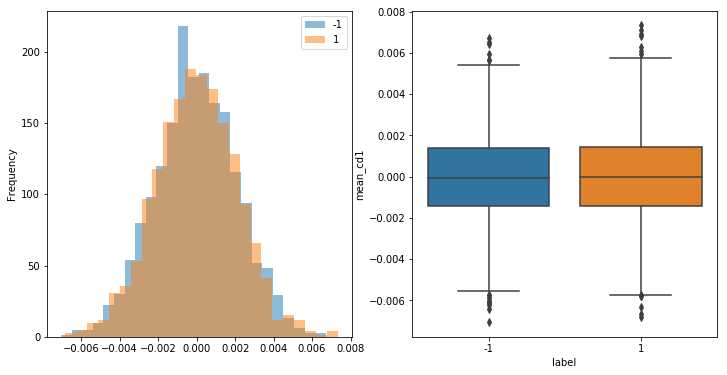

In [73]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_cd1', data = df_feature,ax=ax[1])

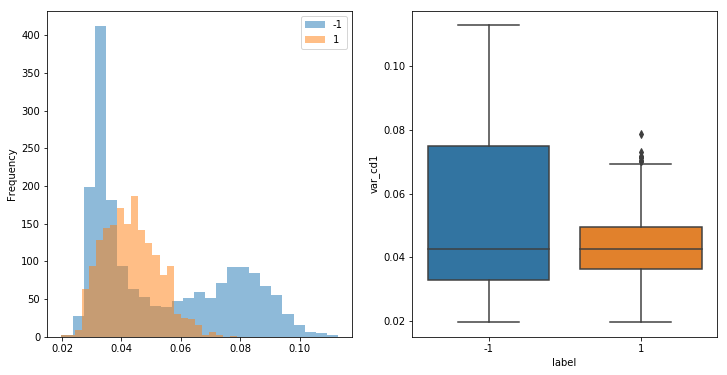

In [74]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_cd1', data = df_feature,ax=ax[1])

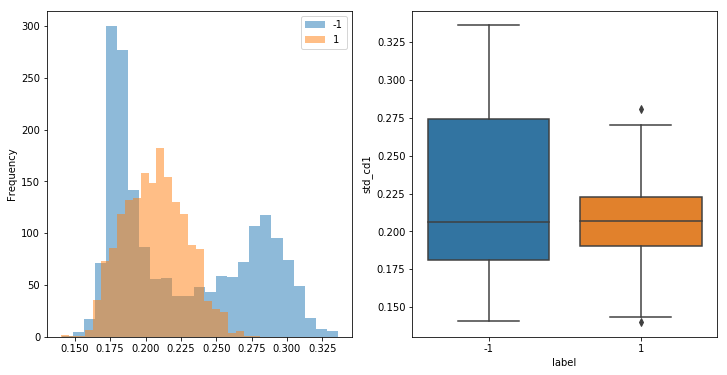

In [75]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_cd1', data = df_feature,ax=ax[1])

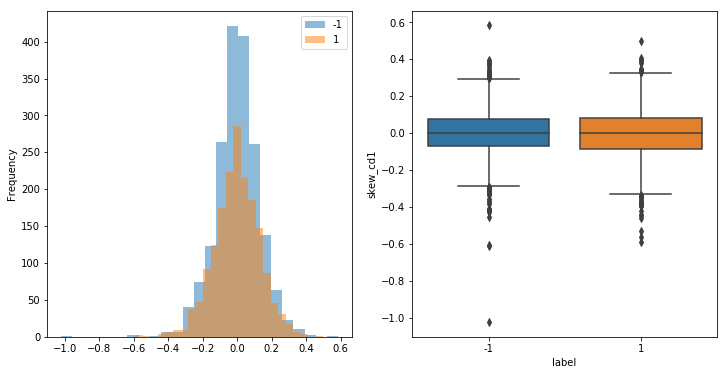

In [76]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_cd1', data = df_feature,ax=ax[1])

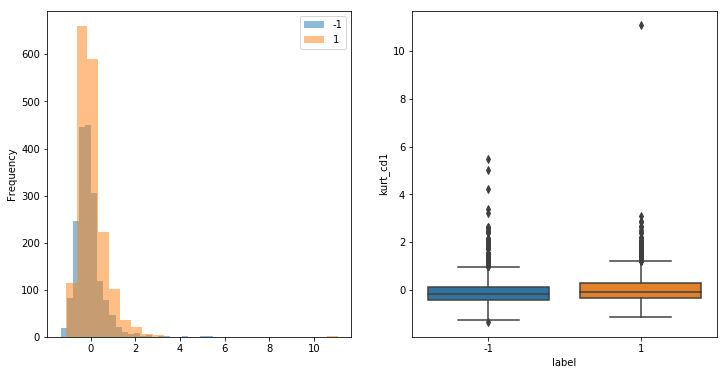

In [77]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_cd1', data = df_feature,ax=ax[1])

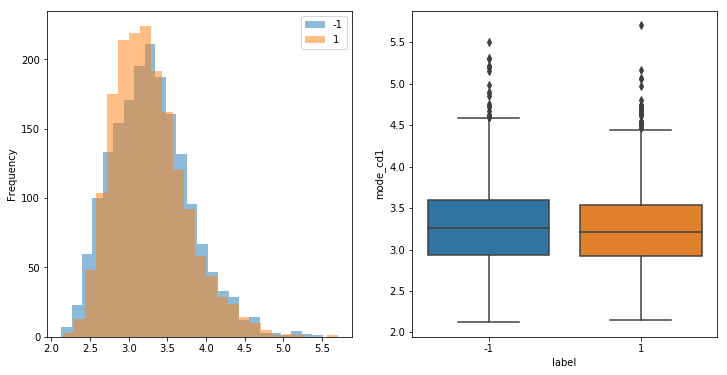

In [78]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_cd1', data = df_feature,ax=ax[1])

## Coefficient Approximation at scale 2

In [79]:
CA2 = []

for x in range(0,result_wave_CA1.shape[0]):
    cA,cD = dwt(result_wave_CA1.iloc[x],'db1')
    CA2.append(cA)

result_wave_CA2 = pd.DataFrame(CA2,index=df_feature.index)

In [80]:
df_feature["mean_ca2"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca2"] = result_wave_CA1.var(axis=1)
df_feature["std_ca2"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca2"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca2"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca2"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca2"] = result_wave_CA1.kurtosis(axis=1)

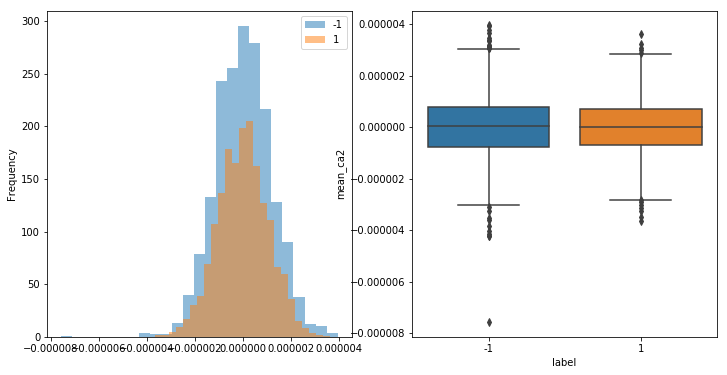

In [81]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca2', data = df_feature,ax=ax[1])

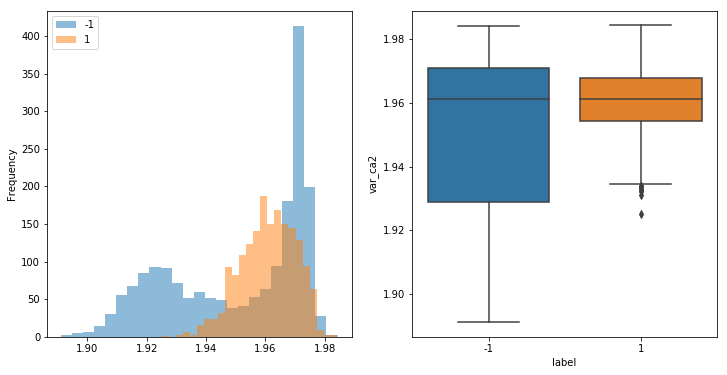

In [82]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca2', data = df_feature,ax=ax[1])

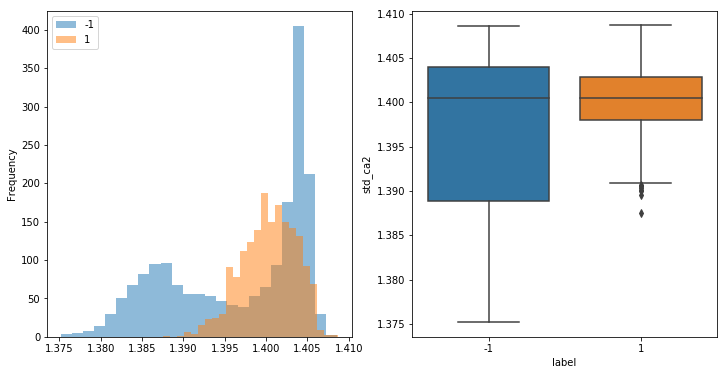

In [83]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca2', data = df_feature,ax=ax[1])

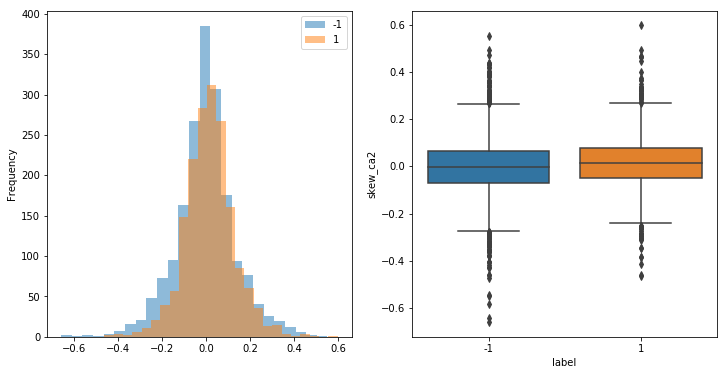

In [84]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca2', data = df_feature,ax=ax[1])

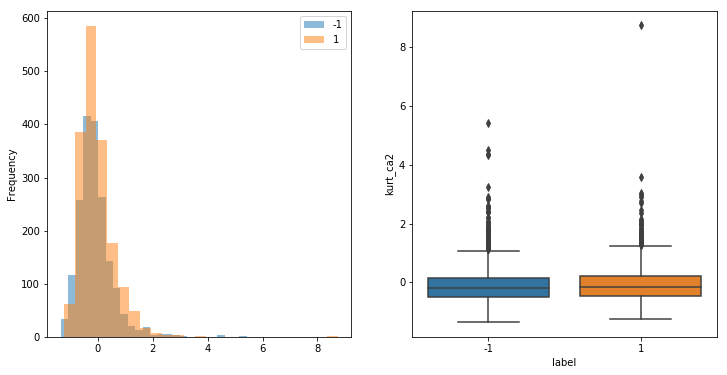

In [85]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca2', data = df_feature,ax=ax[1])

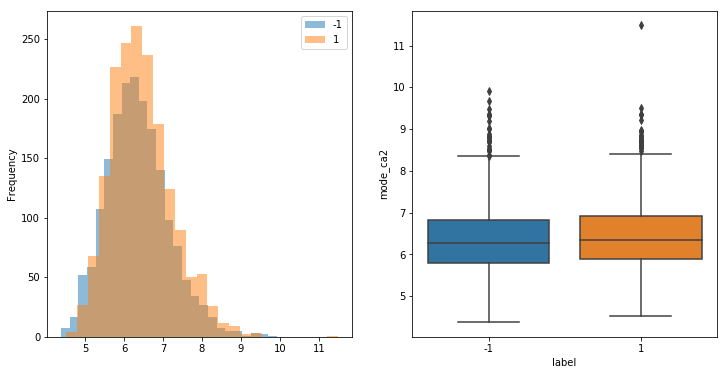

In [86]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca2', data = df_feature,ax=ax[1])

# Coeefficient approximation scale 3

In [87]:
CA3 = []

for x in range(0,result_wave_CA2.shape[0]):
    cA,cD = dwt(result_wave_CA2.iloc[x],'db1')
    CA3.append(cA)

result_wave_CA3 = pd.DataFrame(CA3,index=df_feature.index)

In [88]:
df_feature["mean_ca3"] = result_wave_CA3.mean(axis=1)
df_feature["var_ca3"] = result_wave_CA3.var(axis=1)
df_feature["std_ca3"] = result_wave_CA3.std(axis=1)
df_feature["skew_ca3"] = result_wave_CA3.skew(axis=1)
df_feature["kurt_ca3"] = result_wave_CA3.kurt(axis=1)
df_feature["mode_ca3"] = result_wave_CA3.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca3"] = result_wave_CA3.kurtosis(axis=1)

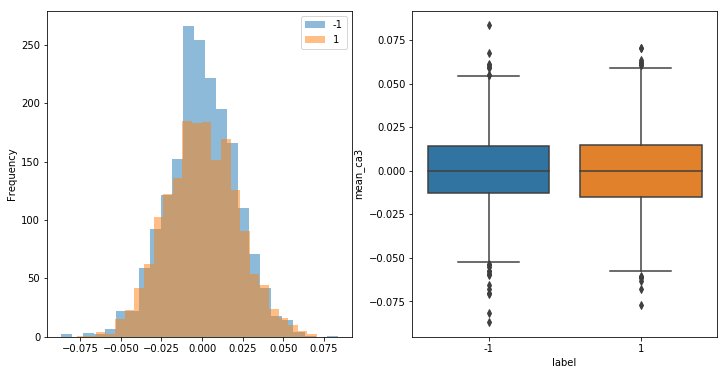

In [89]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca3', data = df_feature,ax=ax[1])

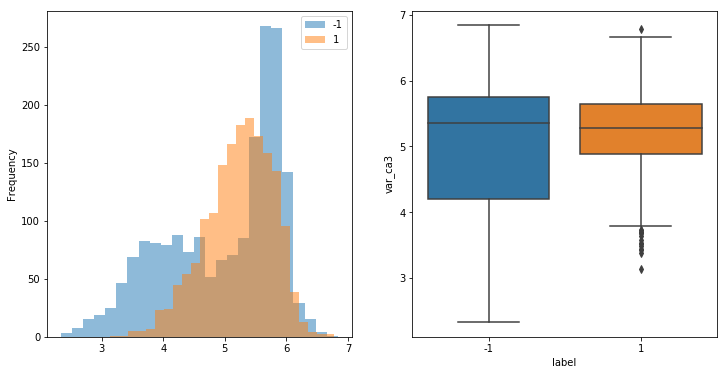

In [90]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca3', data = df_feature,ax=ax[1])

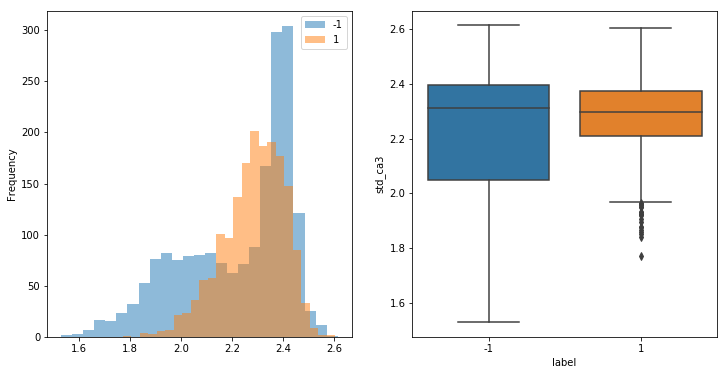

In [91]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca3', data = df_feature,ax=ax[1])

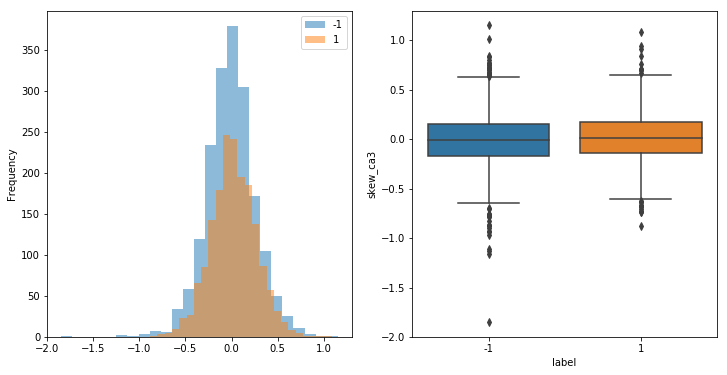

In [92]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca3', data = df_feature,ax=ax[1])

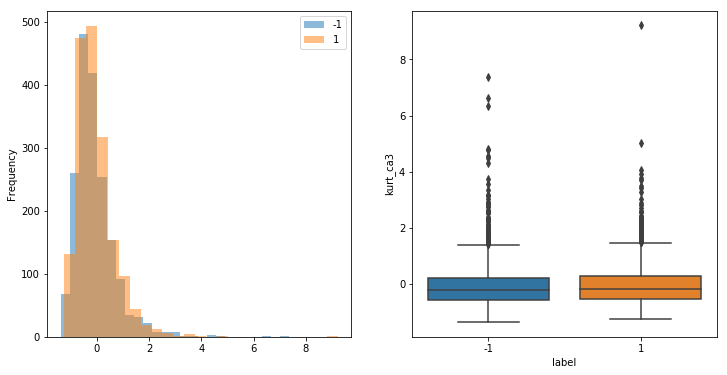

In [93]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca3', data = df_feature,ax=ax[1])

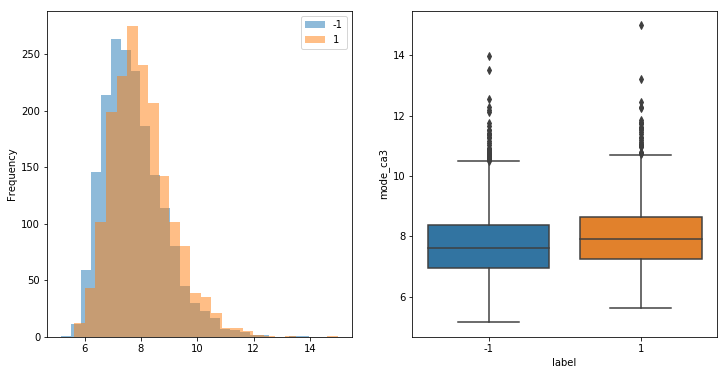

In [94]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca3', data = df_feature,ax=ax[1])

## Coefficient approximaion scale4

In [95]:
CA4 = []

for x in range(0,result_wave_CA3.shape[0]):
    cA,cD = dwt(result_wave_CA3.iloc[x],'db1')
    CA4.append(cA)

result_wave_CA4 = pd.DataFrame(CA4,index=df_feature.index)

In [96]:
df_feature["mean_ca4"] = result_wave_CA4.mean(axis=1)
df_feature["var_ca4"] = result_wave_CA4.var(axis=1)
df_feature["std_ca4"] = result_wave_CA4.std(axis=1)
df_feature["skew_ca4"] = result_wave_CA4.skew(axis=1)
df_feature["kurt_ca4"] = result_wave_CA4.kurt(axis=1)
df_feature["mode_ca4"] = result_wave_CA4.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca4"] = result_wave_CA4.kurtosis(axis=1)

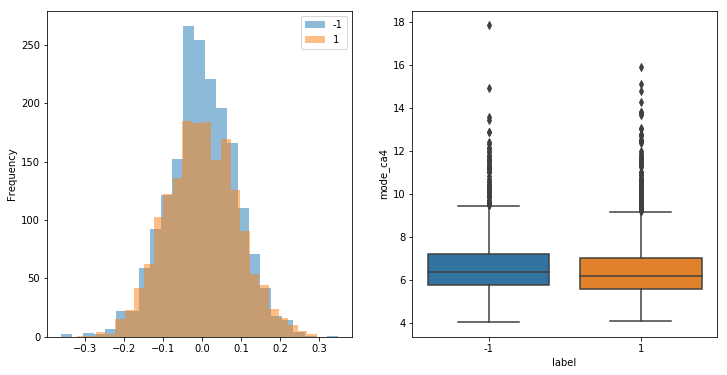

In [97]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

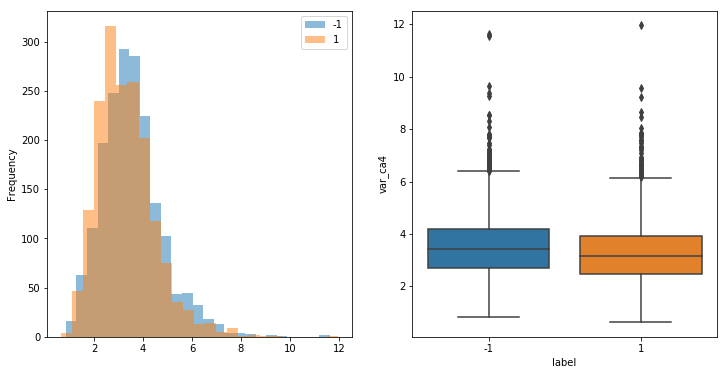

In [98]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca4', data = df_feature,ax=ax[1])

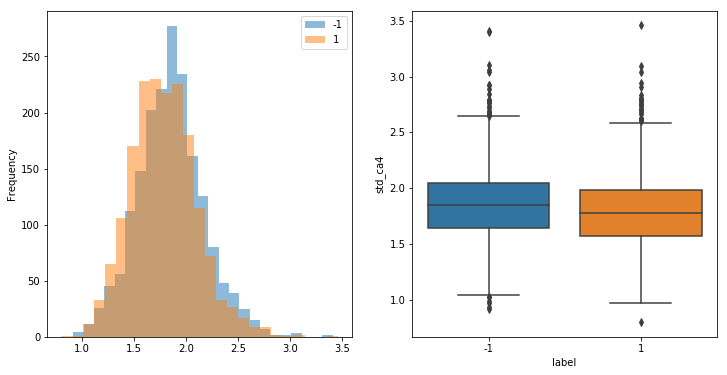

In [99]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca4', data = df_feature,ax=ax[1])

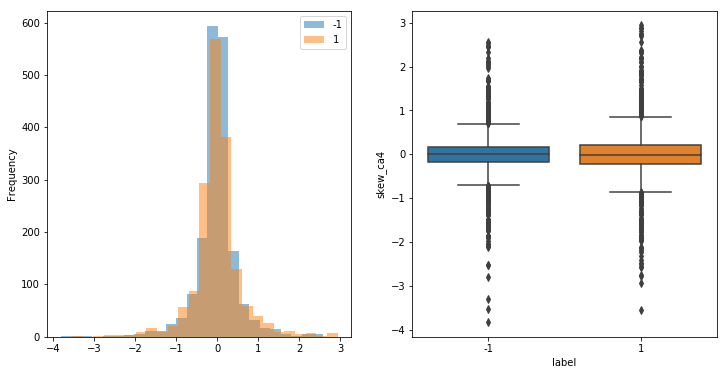

In [100]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca4', data = df_feature,ax=ax[1])

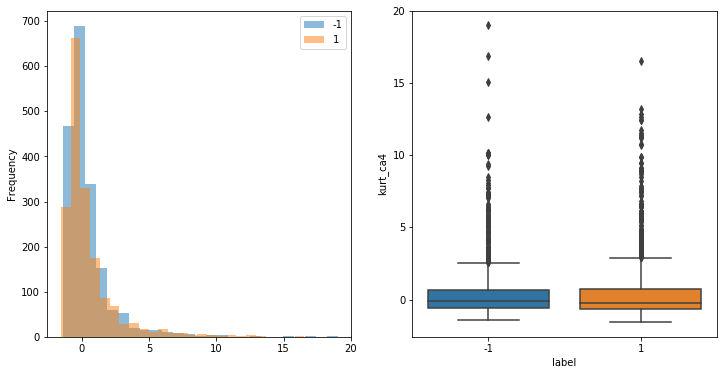

In [101]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca4', data = df_feature,ax=ax[1])

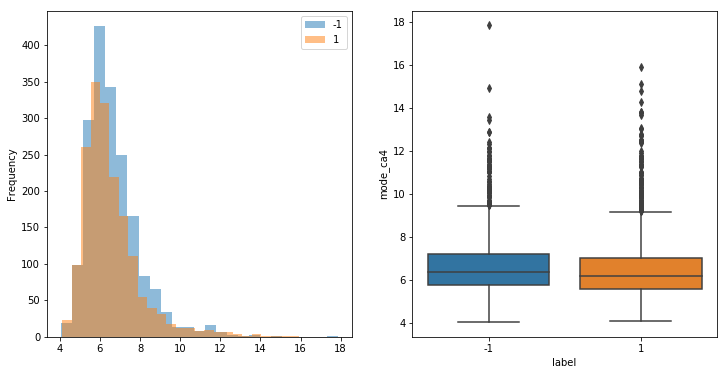

In [102]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

# Autocorelation

In [103]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

In [104]:
arr = []
for i in range(0,result.shape[0]):
    ar = autocorr(result.iloc[i])
    arr.append(ar)  

result_ac = pd.DataFrame(arr,index=df_feature.index)
#result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

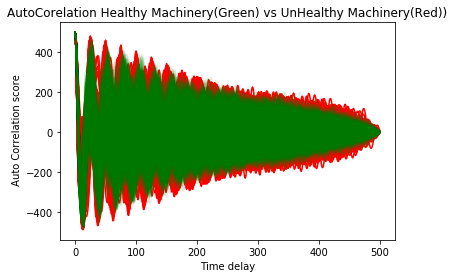

In [105]:
# FFT superimpose Good engine vs Bad engine
result_ac['label'] = df_feature['label']
result_ac_good = result_ac[result_ac['label'] == 1]
result_ac_good = result_ac_good.drop(['label'],axis=1)
result_ac_bad = result_ac[result_ac['label'] == -1]
result_ac_bad = result_ac_bad.drop(['label'],axis=1)
for ix in range(0,result_ac_bad.shape[0]):
    plt.plot([i for i in range(0,500)], result_ac_bad.iloc[ix][0:500], linestyle='-', color='red')
for ix in range(0,result_ac_good.shape[0]):
    plt.plot([i for i in range(0,500)], result_ac_good.iloc[ix][0:500], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Time delay')
plt.ylabel(' Auto Correlation score')
plt.title('AutoCorelation Healthy Machinery(Green) vs UnHealthy Machinery(Red))');